In [1]:
import sys
sys.path.insert(0, '../scripts')

import direction_transition as dit
import paths
from preprocessing import read_csv_clean
from intervals import mean_pellet_collect_time

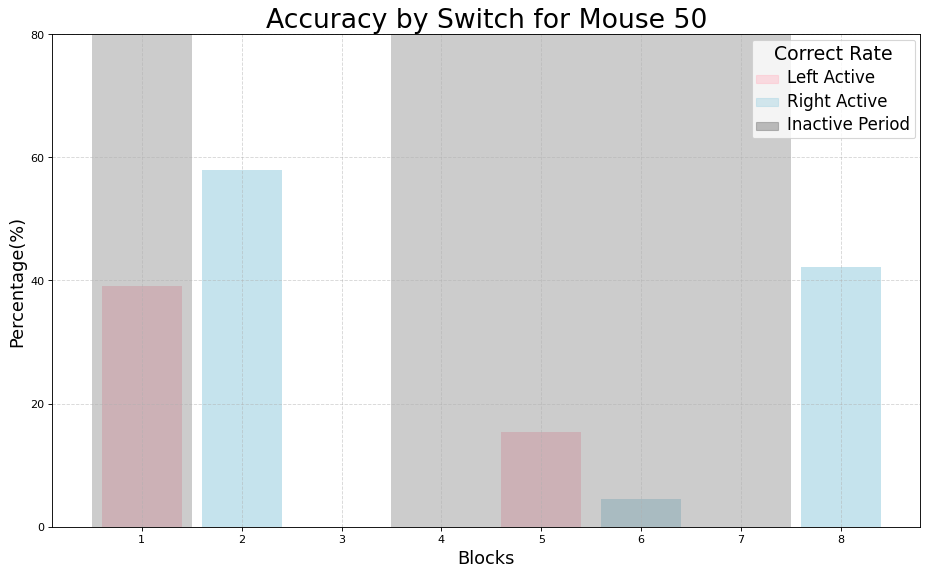

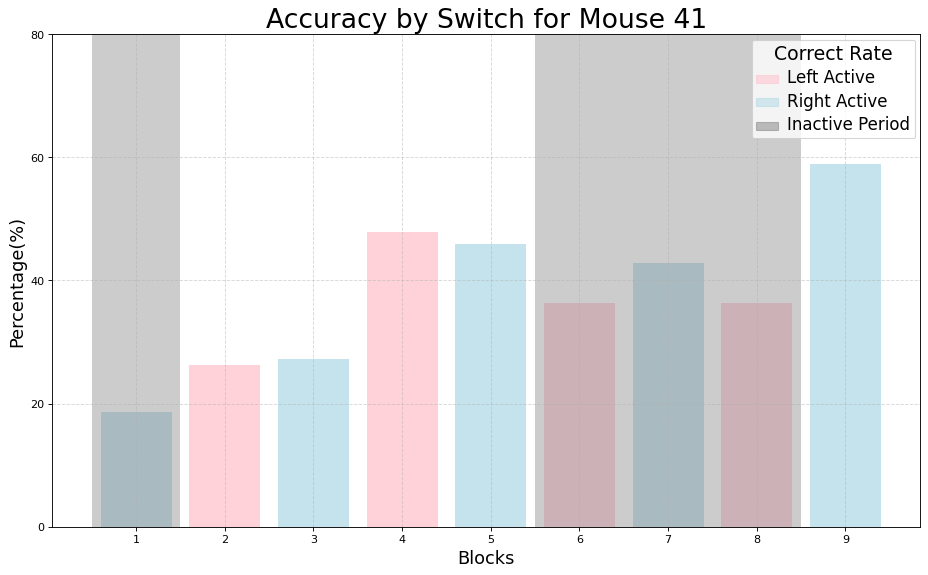

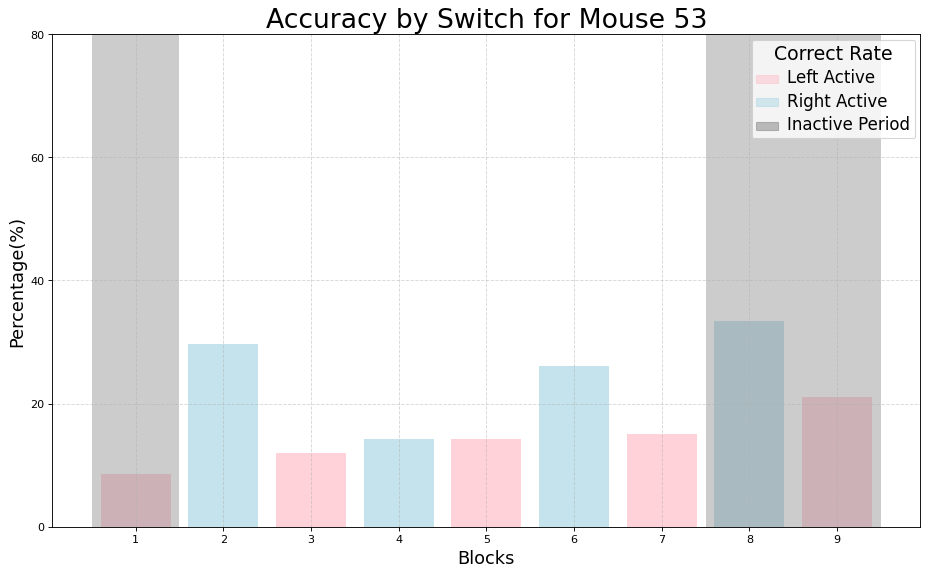

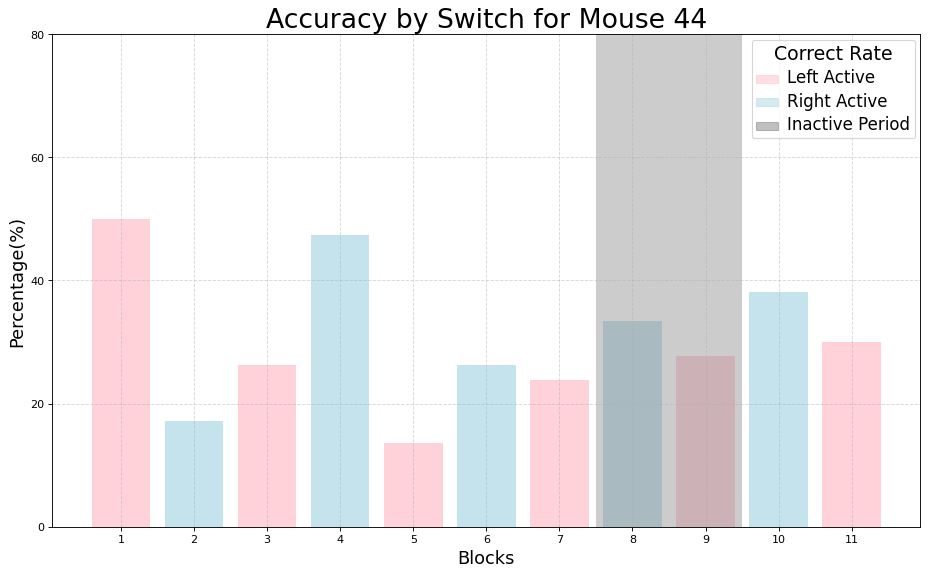

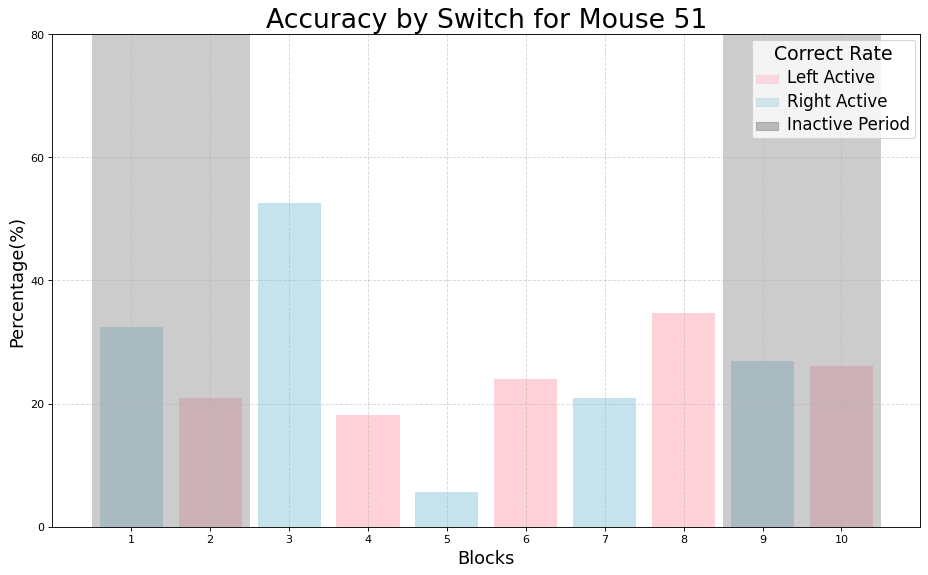

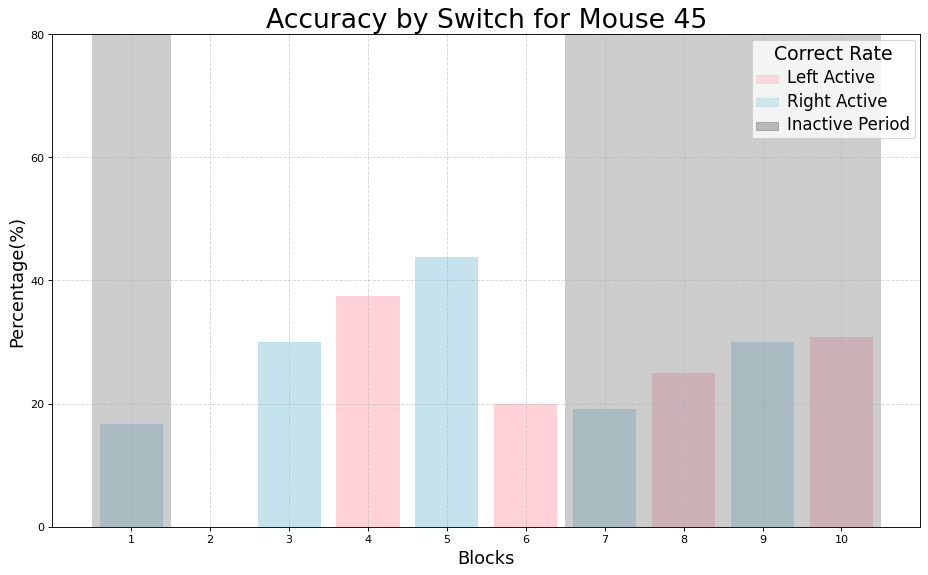

In [2]:
action_prop = 0.3
block_prop = 0.6

ctrl_scores = []

for path in paths.reversal_ivsa_ctrl:
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_learning_trend(data_stats, blocks, path, block_prop=block_prop, action_prop=action_prop)
    ctrl_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

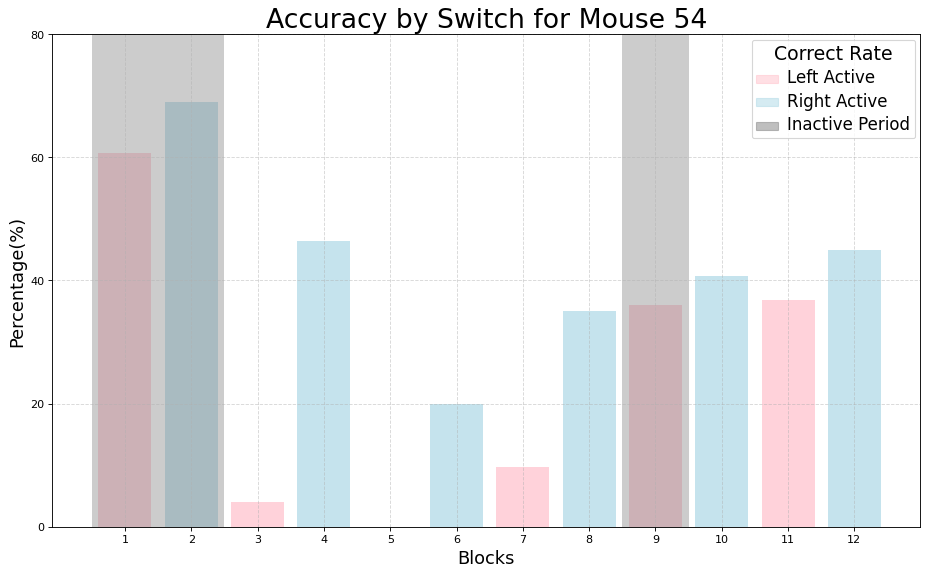

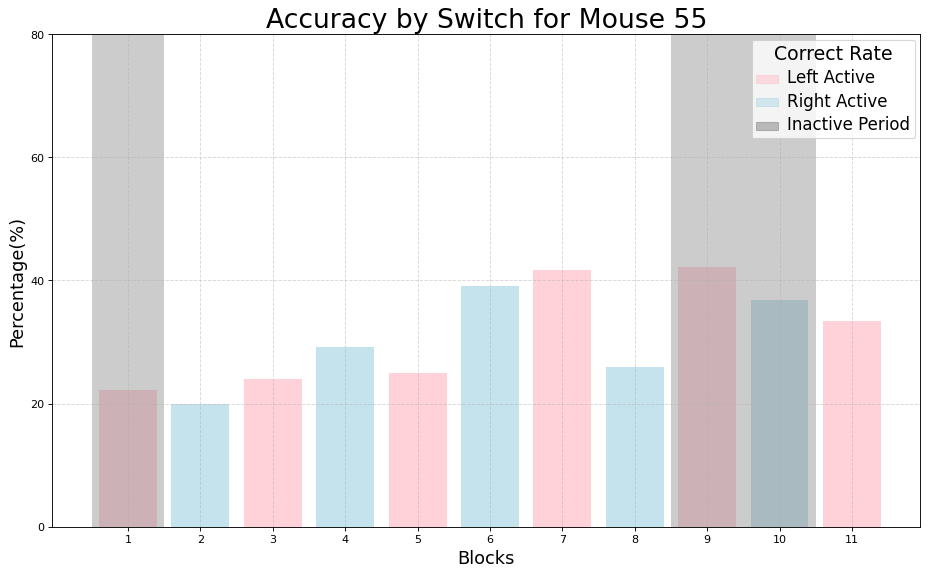

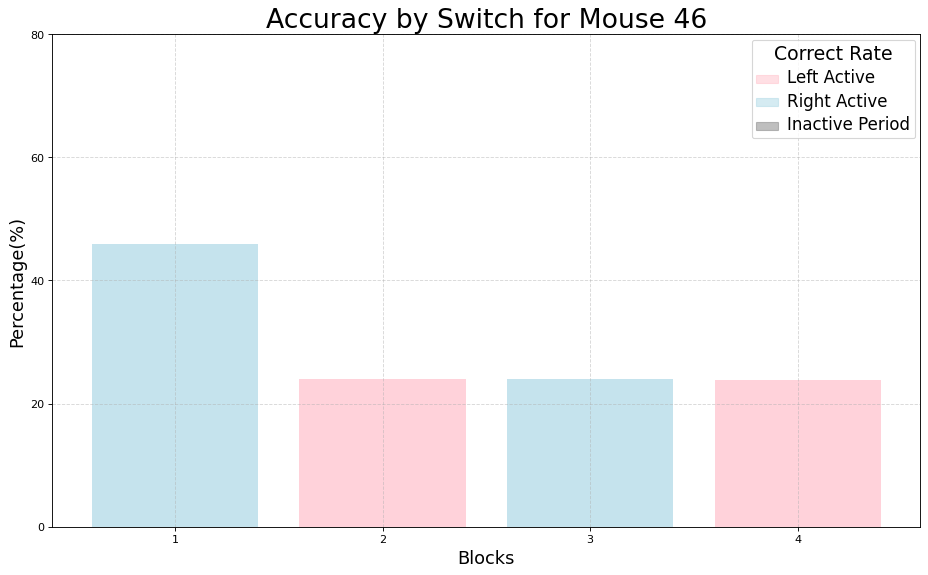

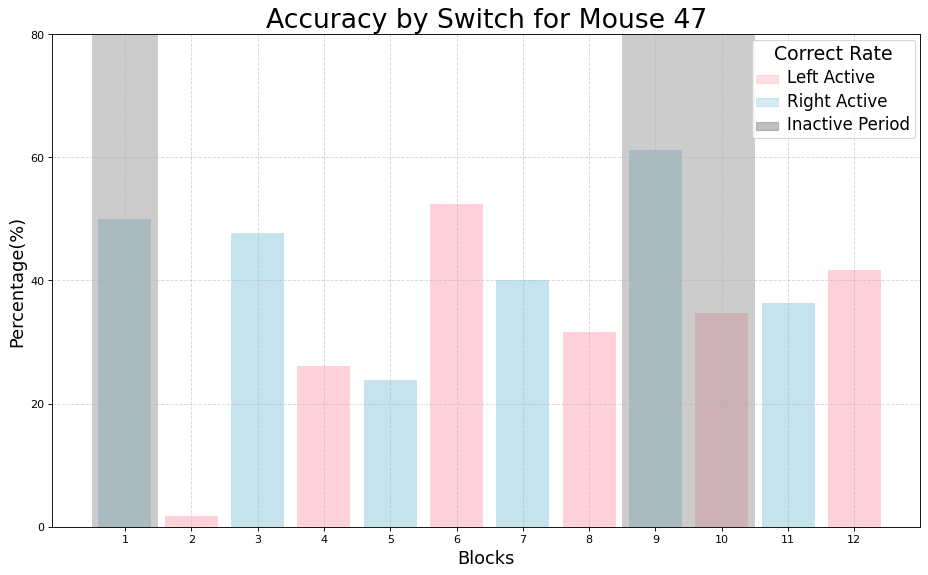

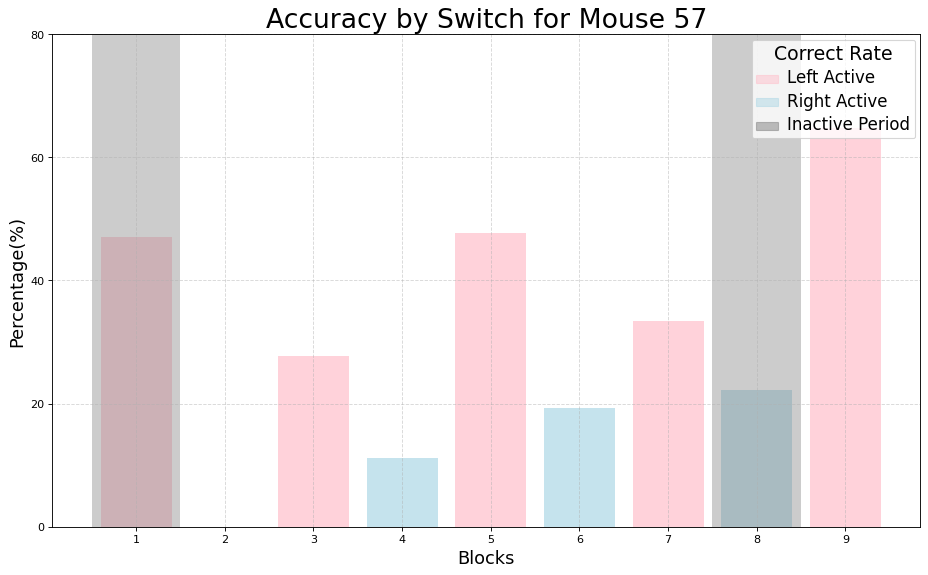

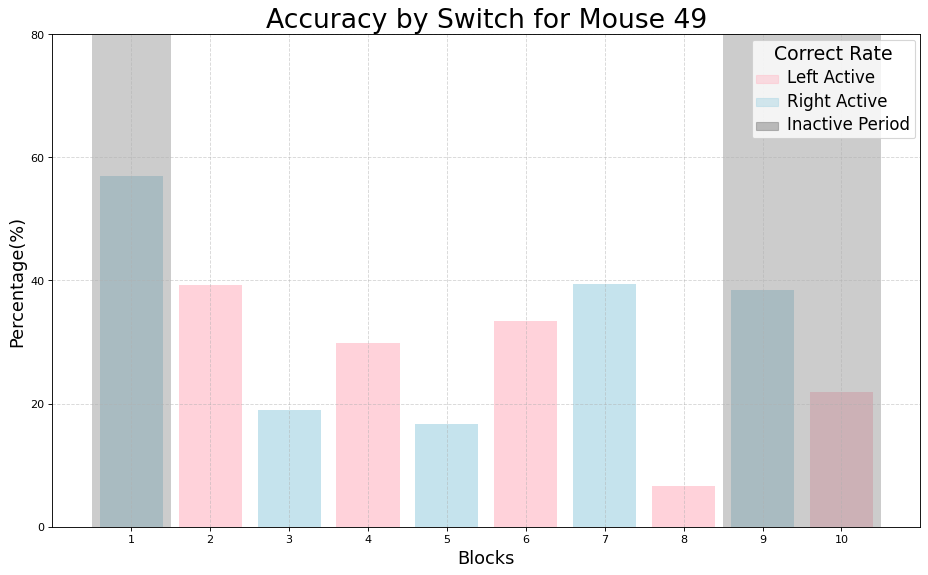

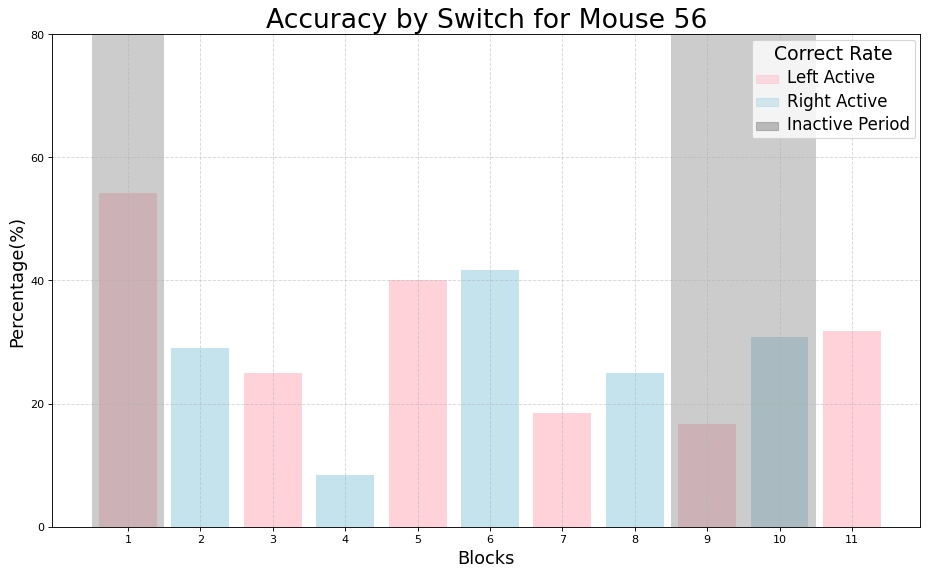

In [3]:
exp_scores = []

for path in paths.reversal_ivsa_exp:
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_learning_trend(data_stats, blocks, path, block_prop=block_prop, action_prop=action_prop)
    exp_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

In [4]:
exp_scores

[32.611851141094164,
 32.680023649944154,
 33.82151875901876,
 37.33465663499989,
 28.705074337427277,
 31.864199991905654,
 27.211689758403054]

In [5]:
import intervals as invs

invs.perform_T_test(ctrl_scores, exp_scores, test_side='greater')

P Value is  0.03793967901284371
Experiment group is significantly greater than control group


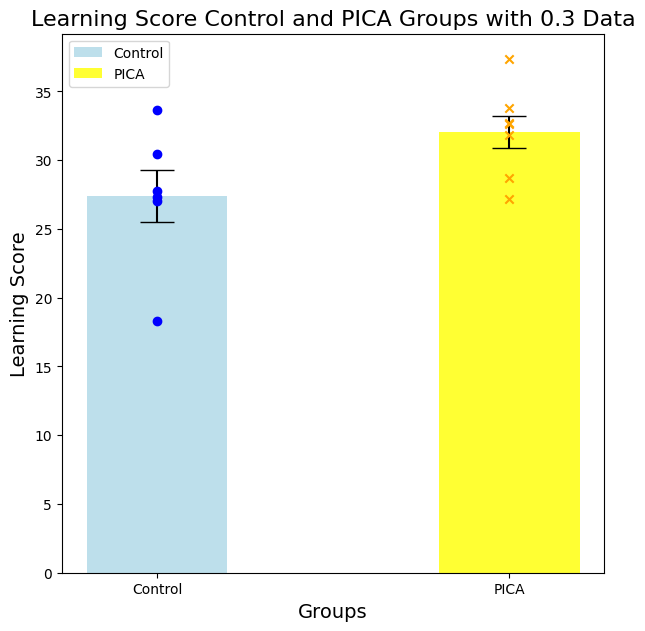

In [6]:
dit.graph_learning_score(ctrl_scores, exp_scores, exp_group_name='PICA', proportion=action_prop)

### Pellet Collect Time

In [7]:
ctrl_all_times = []
ctrl_means = []
ctrl_stds = []

for file in paths.reversal_ivsa_ctrl:
    times, mean, std = mean_pellet_collect_time(file, remove_outlier=True, n_stds=5)
    ctrl_all_times.append(times)
    ctrl_means.append(mean)
    ctrl_stds.append(std)

In [8]:
cask_all_times = []
cask_means = []
cask_stds = []

for file in paths.reversal_ivsa_exp:
    times, mean, std = mean_pellet_collect_time(file, remove_outlier=True, n_stds=5)
    cask_all_times.append(times)
    cask_means.append(mean)
    cask_stds.append(std)

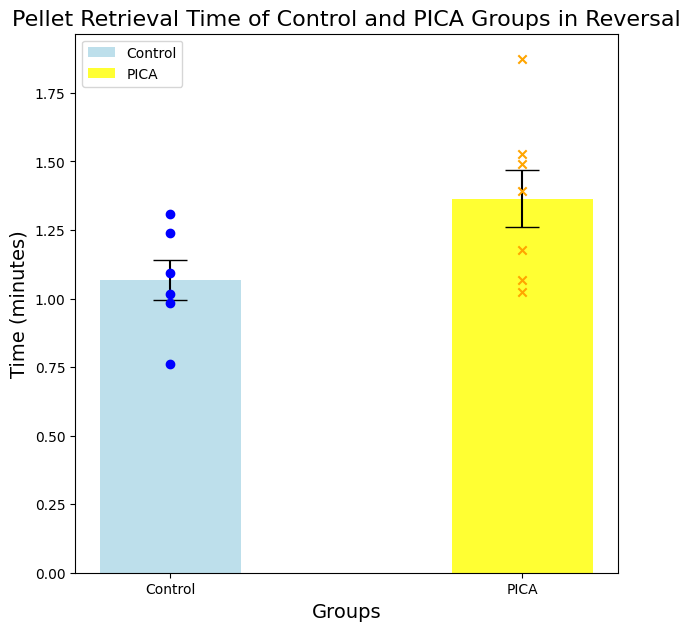

In [9]:
dit.graph_retrieval_time(ctrl_means, cask_means, exp_group_name='PICA')

In [10]:
import intervals as invs

invs.perform_T_test(ctrl_means, cask_means, test_side='greater')

P Value is  0.03134552686463357
Experiment group is significantly greater than control group


In [11]:
invs.perform_T_test(ctrl_stds, cask_stds, test_side='greater')

P Value is  0.005398306062824635
Experiment group is significantly greater than control group
